In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
df=pd.read_csv('..\Pollution Know center\\5sta(DNOWS)_3com(NO2,PM10K,O3)_year2010_TemporalDummies_Ox_holidays_meteo.csv',)
N_NO2=df['N_NO2'][3287:3652]
dates=df['Unnamed: 0'][3287:3652]

df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df['year'] = df['Unnamed: 0'].dt.year
df['month'] = df['Unnamed: 0'].dt.month
df['day'] = df['Unnamed: 0'].dt.day
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

month=df['month'][3287:3652]
year=df['year'][3287:3652]
day=df['day'][3287:3652]

dict = {'day': day, 'month': month, 'year': year,'N_NO2':N_NO2} 

df_pivot = pd.DataFrame(dict)  
df_pivot=df_pivot.pivot('day','month','N_NO2')


In [47]:
dates

3287    2019-01-01
3288    2019-01-02
3289    2019-01-03
3290    2019-01-04
3291    2019-01-05
           ...    
3647    2019-12-27
3648    2019-12-28
3649    2019-12-29
3650    2019-12-30
3651    2019-12-31
Name: Unnamed: 0, Length: 365, dtype: object

In [48]:
N_NO2

3287    21.271215
3288    29.237658
3289    15.499404
3290     8.864778
3291    31.841703
          ...    
3647    23.073343
3648    26.510263
3649     9.635644
3650    20.983927
3651    40.447067
Name: N_NO2, Length: 365, dtype: float64

In [49]:
test = pd.DataFrame(index=df.loc[N_NO2.index]['Unnamed: 0'], data=N_NO2.values)

In [50]:
test

,0
Unnamed: 0,
2019-01-01,21.271215
2019-01-02,29.237658
2019-01-03,15.499404
2019-01-04,8.864778
2019-01-05,31.841703
...,...
2019-12-27,23.073343
2019-12-28,26.510263
2019-12-29,9.635644


In [51]:
df.loc[N_NO2.index]

,Unnamed: 0,D_NO2,D_PM10K,N_NO2,N_O3,N_PM10K,O_NO2,O_PM10K,S_NO2,S_O3,...,West_Temp,West_Winddirection,West_Windspeed,Ost_Pressure,Ost_RH,Ost_Temp,Ost_Winddirection,Ost_Windspeed,month,day
3287,2019-01-01,52.095100,17.975157,21.271215,37.208930,9.566993,32.775032,25.029177,35.934326,55.437870,...,5.293867,183.77876,0.446079,983.15890,79.090640,5.180105,173.91730,0.468734,1,1
3288,2019-01-02,49.778606,58.018124,29.237658,19.853159,40.039993,33.409767,44.575634,34.618260,55.437870,...,2.760878,203.95891,0.287718,980.19434,93.883430,2.425824,183.69041,0.266502,1,2
3289,2019-01-03,34.697414,14.273133,15.499404,50.732708,7.700563,21.417612,9.343574,22.323366,55.437870,...,1.544568,296.05524,1.140827,974.64844,88.701120,1.135029,264.00385,0.990590,1,3
3290,2019-01-04,31.706593,18.616228,8.864778,65.380646,8.097428,19.208975,8.287168,16.294990,55.437870,...,-1.021061,281.14728,1.161445,981.55200,73.244225,-1.405239,272.12057,1.012375,1,4
3291,2019-01-05,55.457720,23.880173,31.841703,39.771970,15.488463,38.360676,26.897135,43.768528,28.947930,...,-1.170092,241.44202,0.757700,983.02730,73.194435,-1.714424,204.10535,0.547054,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,42.896410,14.158325,23.073343,26.421019,12.136672,27.651588,17.244068,27.613255,22.941628,...,3.855676,166.21574,0.396101,978.11957,74.459404,3.825488,178.62665,0.344593,12,27
3648,2019-12-28,47.676907,18.317930,26.510263,15.883890,14.806676,32.534386,19.250828,36.071026,4.096552,...,1.783459,173.59636,0.404630,980.36370,88.451990,1.534930,178.49348,0.355831,12,28
3649,2019-12-29,26.288273,11.508529,9.635644,46.977974,8.385465,13.178259,15.392193,12.822486,41.805080,...,1.893858,285.52164,1.091225,987.81323,56.840267,2.166843,265.23960,0.940522,12,29
3650,2019-12-30,35.675564,20.209654,20.983927,34.843570,15.390346,25.528986,18.130598,24.191557,24.958637,...,-1.063109,205.62457,0.518293,991.46950,64.973625,-1.339570,198.65114,0.463675,12,30


In [52]:
df_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1,21.271215,41.012880,32.671944,15.784974,15.854021,10.975648,8.592191,13.316980,14.000776,15.183805,15.946275,18.184795
2,29.237658,41.376070,24.324892,23.394321,7.804247,9.698937,14.796687,8.126397,10.300538,18.265203,12.755582,18.406664
3,15.499404,31.255629,23.112263,21.826382,16.211730,10.351673,10.714208,15.625525,11.075973,20.537682,16.336830,30.585361
4,8.864778,13.556711,21.405085,24.761345,12.220311,13.256354,10.250716,7.376479,7.994519,9.153808,15.803050,41.249054
5,31.841703,13.836262,25.351770,20.072496,6.164776,13.135837,8.629042,13.432130,15.286012,14.653537,21.532658,36.494860
6,45.225616,34.228170,25.524046,16.829860,3.467264,11.570312,11.878324,13.649749,14.456436,15.612397,20.594374,28.921667
7,22.455156,42.649033,29.938992,11.202239,7.499878,10.766349,10.018226,15.191605,11.927278,5.133369,26.271238,32.264480
8,29.777494,46.814568,9.625441,10.094524,16.363424,11.449887,9.057130,12.339704,9.227900,10.820823,20.464810,32.847515
9,41.754070,48.720330,15.497582,15.617590,14.616807,10.749885,13.691671,11.848220,9.812085,18.673004,18.924545,31.833458


Text(0.5, 1.0, '2019')

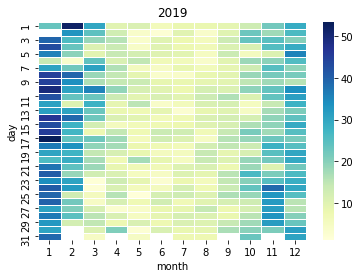

In [25]:
ax = sns.heatmap(df_pivot,linewidths=.5,cmap="YlGnBu")
ax.set_title('2019')
plt.xlabel('Years', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Monthes', fontsize = 15) # y-axis label with fontsize 15

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
df=pd.read_csv('..\Pollution Know center\\5sta(DNOWS)_3com(NO2,PM10K,O3)_year2010_TemporalDummies_Ox_holidays_meteo.csv',)
N_NO2=df['N_NO2'][3654:4019]
dates=df['Unnamed: 0'][3654:4019]

df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df['year'] = df['Unnamed: 0'].dt.year
df['month'] = df['Unnamed: 0'].dt.month
df['day'] = df['Unnamed: 0'].dt.day
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

month=df['month'][3654:4019]
year=df['year'][3654:4019]
day=df['day'][3654:4019]

dict = {'day': day, 'month': month, 'year': year,'N_NO2':N_NO2} 

df_pivot = pd.DataFrame(dict)  
df_pivot=df_pivot.pivot('day','month','N_NO2')

Text(0.5, 1.0, '2020')

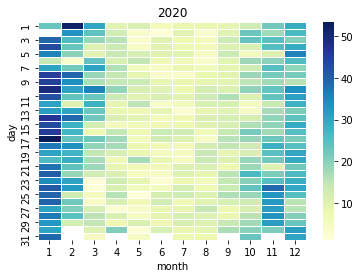

In [26]:
ax = sns.heatmap(df_pivot,linewidths=.5,cmap="YlGnBu")
ax.set_title('2020')